<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [3]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [4]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [5]:
import spacy

In [6]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [7]:
len(content)

2340566

In [8]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [9]:
characters = set(characters1) | set(characters2) | set(characters3)

In [10]:
characters = [c for c in list(characters) if c[0].isupper()]

In [11]:
len(characters)

778

In [12]:
characters = sorted(characters)

In [13]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [14]:
len(unique_characters)

535

In [15]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [16]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [18]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [19]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [20]:
characters

,character,character_real
0,Rosa,Rosa
1,Watling,Watling
2,Kill Ashley,Ashley
3,Darcy,Darcy
4,Ulster,Ulster
...,...,...
221,Sadie Belle,Belle
222,Wynder,Wynder
223,Rene,Rene
224,Pork,Pork


In [21]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [22]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [23]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [24]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [25]:
result_df

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
...,...,...
13005,"""I won't think of it now,""",Dialogue
13006,"she said again, aloud, trying to push\nher mis...",Narrative
13007,"""I'll--why, I'll go home to Tara\ntomorrow,""",Dialogue
13008,and her spirits lifted faintly.\n\nShe had gon...,Narrative


In [26]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [27]:
result_df.head(n = 50)

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
6,answered Brent carelessly.,Narrative
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue
9,"""Why?""",Dialogue
11,"""The war, goose! The war's going to start any...",Dialogue
13,"""You know there isn't going to be any war,""",Dialogue


##4. Match Entities between Dialogue Sections

In [28]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [29]:
result_df.head(n=50)

,text,type,Entities
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative,"[Scarlett, Tarleton, Stuart, Brent, Tarleton, ..."
1,"""I know you two don't care about being expelle...",Dialogue,None
2,she said.,Narrative,[]
3,"""But what about Boyd? He's kind of set on get...",Dialogue,None
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue,None
6,answered Brent carelessly.,Narrative,[Brent]
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue,None
9,"""Why?""",Dialogue,None
11,"""The war, goose! The war's going to start any...",Dialogue,None
13,"""You know there isn't going to be any war,""",Dialogue,None


In [30]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [31]:
convo_df = convo_df.dropna()

In [32]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [33]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

<ipython-input-33-c4708b940e33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)


In [34]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

<ipython-input-34-bdde5ff3bd82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convo_df['character_count'] = convo_df['text_out'].apply(len)


In [35]:
convo_df

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count
0,Scarlett,Brent,1,19,"""I know you two don't care about being expelle...",Brent_Scarlett,1015
0,Stuart,Scarlett,21,27,"""The Yankees may be scared of us, but after th...",Scarlett_Stuart,971
0,Tom,Fontaine,29,33,"""Didn't she say anything when you got home las...",Fontaine_Tom,1302
0,Beatrice,Tarleton,35,35,"""Of course she won't hit Boyd. She never did ...",Beatrice_Tarleton,126
0,Stuart,Scarlett,37,49,"""That's why we left him\nat home to explain th...",Scarlett_Stuart,714
...,...,...,...,...,...,...,...
0,Ashley,Scarlett,12887,12897,"""But love can't wear out!""""Yours for Ashley di...",Ashley_Scarlett,1702
0,Rhett,Belle,12899,12911,"""It was so obvious that we were meant for each...",Belle_Rhett,2113
0,Ashley,Rhett,12913,12947,"""But then, there was Bonnie and I saw that eve...",Ashley_Rhett,2358
0,Gerald,Rhett,12949,12971,"""Don't be a fool, Rhett! I can make--""""Don't ...",Gerald_Rhett,1676


<Axes: xlabel='characters'>

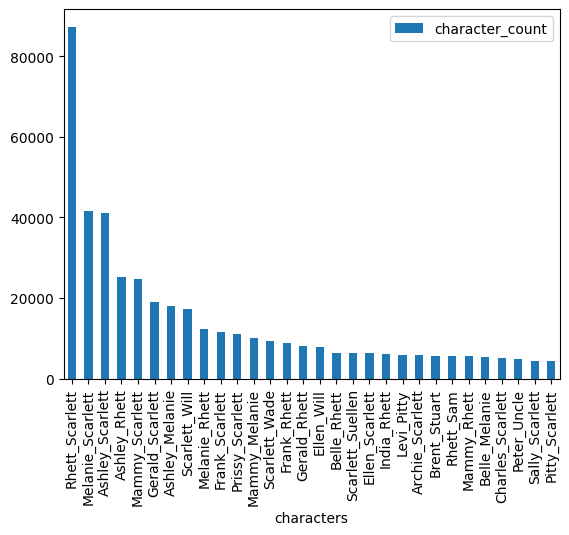

In [36]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [37]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [38]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [39]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

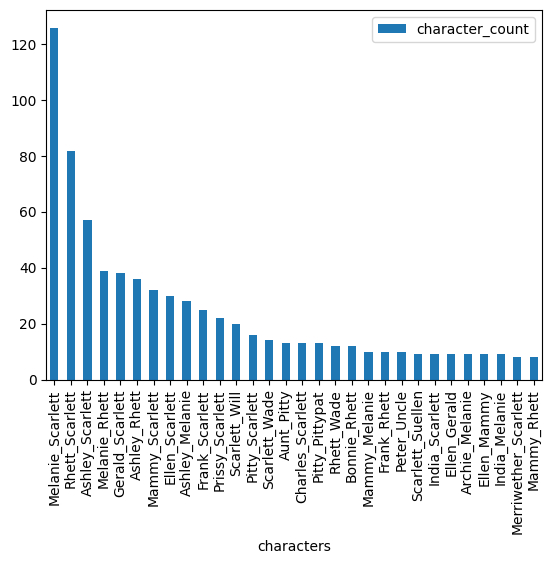

In [40]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [46]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [47]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
punctuations = list(string.punctuation)
custom_list_of_extra_stopwords = ["n't", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "there's", "there're", "they'd", "they've"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + additional_stopwords + punctuations + custom_list_of_extra_stopwords)

# Define a function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize the text
    text_tokens = word_tokenize(text)
    # Remove stopwords
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text

# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                       `` careful careful take back ``
1     `` something important tell hardly know say ``...
2        `` none County touch state `` `` Well Missy ``
3     `` reason bought asked buy `` `` Well use buyi...
4     `` Twelve Oaks `` `` usual Cade settled set ga...
5     `` Well speak `` `` asked kindly sisters said ...
6     `` sorry daughter nothing child lots beaux `` ...
7     `` wish quit pushing want Tara old plantation ...
8     `` young 'Twill come love land getting away Ir...
9         `` brat baptized `` `` Yes dead poor thing ``
10    `` idea love `` `` could know always acted pri...
11    `` getting another overseer would cheating eye...
12    `` Put tray come lace tighter `` `` try eat li...
13    `` remember beautiful day till die `` `` Perha...
14    `` Mrs. takes toss every hunt `` `` breaks col...
15    `` Drive wear get horses yet course right righ...
16       `` looks -- knew looked like without shimmy ``
17    `` live barbecue till afternoon `` `` cour

### 5.2 Vectorize text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))

In [ ]:
convo_df_main['characters'].value_counts()

characters
Melanie_Scarlett    126
Rhett_Scarlett       82
Ashley_Scarlett      57
Gerald_Scarlett      38
Mammy_Scarlett       32
Name: count, dtype: int64

In [ ]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_train = convo_df_main.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 25)

In [ ]:
df_test = convo_df_main[~convo_df_main.index.isin(df_train.index)]

In [ ]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Ashley_Scarlett     25
Gerald_Scarlett     25
Mammy_Scarlett      25
Melanie_Scarlett    25
Rhett_Scarlett      25
Name: count, dtype: int64
characters
Melanie_Scarlett    101
Rhett_Scarlett       57
Ashley_Scarlett      32
Gerald_Scarlett      13
Mammy_Scarlett        7
Name: count, dtype: int64


In [ ]:
X_train = vectorizer.fit_transform(df_train['text_out_test'])
X_test = vectorizer.transform(df_test['text_out_test'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [ ]:
y_train.value_counts()

characters
Ashley_Scarlett     25
Gerald_Scarlett     25
Mammy_Scarlett      25
Melanie_Scarlett    25
Rhett_Scarlett      25
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

characters
Melanie_Scarlett    101
Rhett_Scarlett       57
Ashley_Scarlett      32
Gerald_Scarlett      13
Mammy_Scarlett        7
Name: count, dtype: int64

##6. Inspect Variables for Correlations


In [ ]:
# # Convert TF-IDF matrix to DataFrame
# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# # Calculate correlation matrix
# correlation_matrix = tfidf_df.corr()

# # Find highly correlated variables
# highly_correlated = set()
# threshold = 0.98  # You can adjust this threshold as needed

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname_i = correlation_matrix.columns[i]
#             colname_j = correlation_matrix.columns[j]
#             highly_correlated.add((colname_i, colname_j))

# print("Highly correlated variables:")
# for pair in highly_correlated:
#     print(pair)

##7. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

array(['Gerald_Scarlett', 'Rhett_Scarlett', 'Mammy_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Gerald_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Mammy_Scarlett',
       'Melanie_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Mammy_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Mammy_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Melanie_Scarlett', 'Gerald_Scarlett',
       'Gerald_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Gerald_Scarlett', 'Mammy_Scarlett', 'Gerald_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Gerald_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarle

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.31      0.34      0.32        32
 Gerald_Scarlett       0.12      0.31      0.17        13
  Mammy_Scarlett       0.29      0.57      0.38         7
Melanie_Scarlett       0.74      0.48      0.58       101
  Rhett_Scarlett       0.49      0.53      0.51        57

        accuracy                           0.46       210
       macro avg       0.39      0.44      0.39       210
    weighted avg       0.55      0.46      0.49       210



In [ ]:
!pip install eli5
import eli5
eli5.show_weights(logreg, feature_names = vectorizer.get_feature_names_out())

## 8. Network Analysis (to delete?)


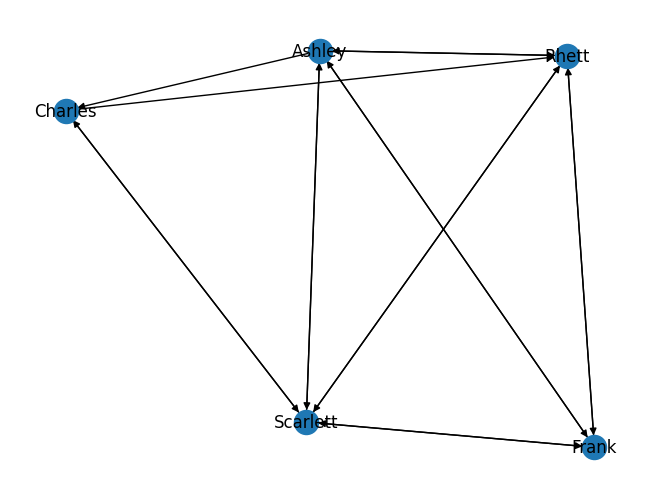

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(convo_df, 'Character1', 'Character2', edge_attr='character_count', create_using=nx.DiGraph())

# Draw the graph (optional)
nx.draw(G, with_labels=True)

In [ ]:
# Calculate edge centrality (you can use other metrics as well)
edge_centrality = nx.edge_betweenness_centrality(G)

# Sort edges based on centrality or weight (replace 'weight' with your desired metric)
sorted_edges = sorted(edge_centrality.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame to display top relationships
top_relationships_df = pd.DataFrame(sorted_edges, columns=['Edge', 'Centrality'])

print(top_relationships_df.head(n= 100))

                   Edge  Centrality
0   (Charles, Scarlett)       0.100
1      (Charles, Rhett)       0.100
2   (Scarlett, Charles)       0.100
3     (Ashley, Charles)       0.100
4       (Rhett, Ashley)       0.100
5    (Scarlett, Ashley)       0.075
6     (Scarlett, Frank)       0.075
7     (Rhett, Scarlett)       0.075
8        (Rhett, Frank)       0.075
9     (Frank, Scarlett)       0.075
10      (Frank, Ashley)       0.075
11    (Scarlett, Rhett)       0.050
12   (Ashley, Scarlett)       0.050
13      (Ashley, Rhett)       0.050
14      (Ashley, Frank)       0.050
15       (Frank, Rhett)       0.050


## 9. LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assume 'df' is your DataFrame containing text data and class labels

# Preprocess the text (e.g., remove stopwords, tokenize)
# Define preprocessing functions as needed

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000, stop_words = "english", ngram_range=(2, 4))  # Adjust parameters as needed
X_tfidf = vectorizer.fit_transform(cath_heathcliff_df['text_out'])

# Perform topic modeling (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics
lda_model.fit(X_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
num_words = 10

In [ ]:
for topic_id, topic_words in enumerate(lda_model.components_):
    top_word_indices = topic_words.argsort()[:-num_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    print(f"Topic {topic_id + 1}:")
    print(", ".join(top_words))
    print()

Topic 1:
ll make, think things, captain butler, didn know, ve gotten, don want, oh damn, oh right, ll think, rough ready

Topic 2:
miss hara, dr meade, god knows, oh hush, hara tell, don know, look like, know love, wouldn believe, ll sit

Topic 3:
miss scarlett, miss melly, mrs wilkes, mr kennedy, don know, captain butler, miss pitty, ah ain, ve got, mr wilkes

Topic 4:
ve got, mrs elsing, rhett butler, oh scarlett, oh rhett, don know, thing world, think ll, look face, general lee

Topic 5:
captain butler, mrs wilkes, don want, ve got, mr wilkes, ve come, old guard, old days, uncle rhett, oh darling

